# Introduction to `fastplotlib`

This notebook goes the basic components of the `fastplotlib` API, image, image updates, line plots, and scatter plots. 

# Documentation

The docs are here: http://fastplotlib.readthedocs.io/

The link is also on the repo, in general you can always find the docs for a package by looking for the link in the repo's README.

In [1]:
from fastplotlib import Plot
from ipywidgets import VBox, HBox, IntSlider
import numpy as np

### Simple image

RFBOutputContext()


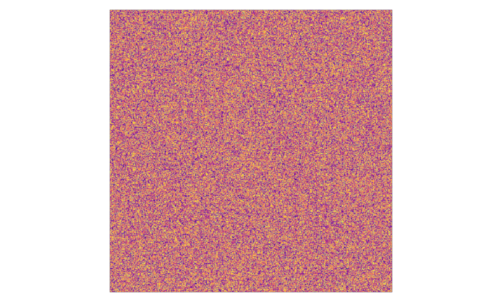

JupyterWgpuCanvas()

In [2]:
# create a `Plot` instance
plot = Plot()

# make some random 2D image data
data = np.random.rand(512, 512)

# plot the image data
image_graphic = plot.add_image(data=data, name="random-image")

# show the plot
plot.show()

### Use the handle on the bottom right corner of the _canvas_ to resize it. You can also pan and zoom using your mouse!

Changing graphic "features"

In [3]:
image_graphic.cmap = "viridis"

In [4]:
image_graphic.data = 0

In [5]:
image_graphic.data[::15, :] = 1
image_graphic.data[:, ::15] = 1

In [6]:
image_graphic.data = np.random.rand(512, 512)

### Plots are indexable and give you their graphics by name

In [7]:
plot.graphics

('random-image': ImageGraphic @ 0x7fc534cb3ca0,)

In [8]:
plot["random-image"]

'random-image': ImageGraphic @ 0x7fc534cb3ca0

#### The `Graphic` instance is also returned when you call `plot.add_<graphic_type>`.

In [9]:
image_graphic

'random-image': ImageGraphic @ 0x7fc534cb3ca0

In [10]:
image_graphic is plot["random-image"]

True

## If you don't have a powerful GPU close the canvas to free it up!

If you are confident that you have a powerful GPU you can leave this open.

In the next release we will make this simpler by allowing `plot.close()`, but for now you have to use `plot.canvas.close()`

In [11]:
plot.canvas.close()

### Image updates

This examples show how you can define animation functions that run on every render cycle.

RFBOutputContext()


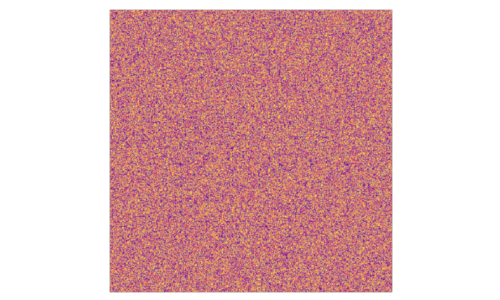

JupyterWgpuCanvas()

In [12]:
# create another `Plot` instance
plot_v = Plot()

plot.canvas.max_buffered_frames = 1

# make some random data again
data = np.random.rand(512, 512)

# plot the data
plot_v.add_image(data=data, name="random-image")

# a function to update the image_graphic
# a plot will pass its plot instance to the animation function as an arugment
def update_data(plot_instance):
    new_data = np.random.rand(512, 512)
    plot_instance["random-image"].data = new_data

#add this as an animation function
plot_v.add_animations(update_data)

# show the plot
plot_v.show()

### We can share controllers across plots

This example creates a new plot, but it synchronizes the pan-zoom controller

RFBOutputContext()


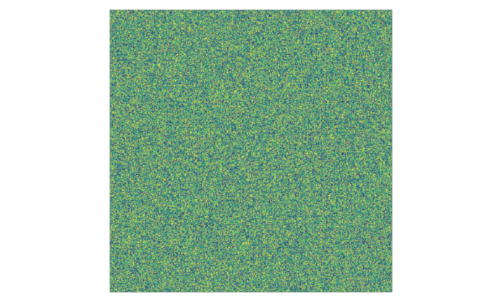

JupyterWgpuCanvas()

In [13]:
plot_sync = Plot(controller=plot_v.controller)

data = np.random.rand(512, 512)

image_graphic_instance = plot_sync.add_image(data=data, cmap="viridis")

# you will need to define a new animation function for this graphic
def update_data_2():
    new_data = np.random.rand(512, 512)
    # alternatively, you can use the stored reference to the graphic as well instead of indexing the Plot
    image_graphic_instance.data = new_data

plot_sync.add_animations(update_data_2)

plot_sync.show()

#### Keeping a reference to the Graphic instance, as shown above `image_graphic_instance`, is useful if you're creating something where you need flexibility in the naming of the graphics

### You can also use `ipywidgets.VBox` and `HBox` to stack plots. See the `gridplot` notebooks for a proper gridplot interface for more automated subplotting

In [14]:
VBox([plot_v.show(), plot_sync.show()])

# Close the canvases

In [15]:
plot_v.canvas.close()
plot_sync.canvas.close()

# Line plots

## 2D line plots

This example plots a sine wave, cosine wave, and ricker wavelet and demonstrates how **Graphic Features** can be modified by slicing!

### First generate some data.

In [16]:
# linspace, create 100 evenly spaced x values from -10 to 10
xs = np.linspace(-10, 10, 100)
# sine wave
ys = np.sin(xs)
sine = np.dstack([xs, ys])[0]

# cosine wave
ys = np.cos(xs) + 5
cosine = np.dstack([xs, ys])[0]

# sinc function
a = 0.5
ys = np.sinc(xs) * 3 + 8
sinc = np.dstack([xs, ys])[0]

### We will plot all of it on the same plot. Each line plot will be an individual Graphic, you can have any combination of graphics on a plot.

RFBOutputContext()


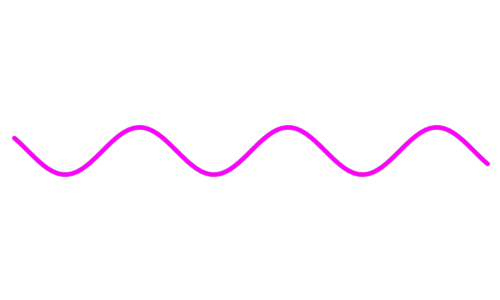

JupyterWgpuCanvas()

In [17]:
# Create a plot instance
plot_l = Plot()

# plot sine wave, use a single color
sine_graphic = plot_l.add_line(data=sine, thickness=5, colors="magenta", name="sine")

plot_l.show()

Add some more lines

In [18]:
# you can also use colormaps for lines!
cosine_graphic = plot_l.add_line(data=cosine, thickness=12, cmap="autumn")

# or a list of colors for each datapoint
colors = ["r"] * 25 + ["purple"] * 25 + ["y"] * 25 + ["b"] * 25
sinc_graphic = plot_l.add_line(data=sinc, thickness=5, colors = colors)

### We can see that there is a cosine `LineGraphic`, but not the sinc Graphic. Use `Plot.auto_scale`

`auto_scale()` is called automatically when you use `show()`, however if you add/modify the `scene` within the plot after calling `show()` you may have to call `auto_scale()`.

In [19]:
plot_l.auto_scale()

### This plot has 3 graphics

Only one of them is named, it is not required to name graphics but it can be useful for organization.

In [20]:
plot_l.graphics

('sine': LineGraphic @ 0x7fc505967070,
 LineGraphic @ 0x7fc4f4636920,
 LineGraphic @ 0x7fc4f46bf640)

## Graphic features support slicing! :D 

In [21]:
# indexing colors
cosine_graphic.colors[:15] = "green"

In [22]:
cosine_graphic.colors[80:95] = "magenta"
cosine_graphic.colors[60] = "w"

In [23]:
# indexing to assign colormaps to entire lines or segments
sinc_graphic.cmap[10:50] = "gray"

In [24]:
# just like with images if the graphic is named you can use the name
plot_l["sine"].cmap = "seismic"


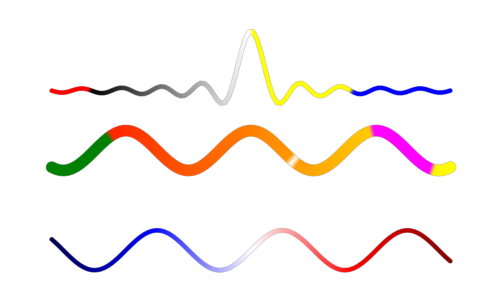

In [25]:
# let's take a snapshot so we can compare before and after the next command
plot_l.canvas.snapshot()

In [26]:
# more complex indexing, set the green value directly from an array
# remember, [n_points, RGBA]
green_vals = np.linspace(0, 1, num=90-65)
cosine_graphic.colors[65:90, 1] = green_vals

In [27]:
# green vals is just evenly spaced values between 0-1
green_vals

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

In [28]:
# more complex indexing of colors
# from point 15 - 30, set every 3rd point as "cyan"
cosine_graphic.colors[15:50:3] = "cyan"

## Graphic _data_ is also indexable

In [29]:
cosine_graphic.data[10:50:5, :2] = sine[10:50:5]
cosine_graphic.data[90:, 1] = 7

In [30]:
cosine_graphic.data[0] = np.array([[-10, 0, 0]])

### Toggle the presence of a graphic within the scene

In [31]:
sinc_graphic.present = False

### scale the plot depending on graphics present in the scene

In [32]:
plot_l.auto_scale()

In [33]:
sinc_graphic.present = True

In [34]:
plot_l.auto_scale()

# Close the canvas

In [35]:
plot_l.canvas.close()

### 3D line plot

RFBOutputContext()

/home/kushal/Insync/kushalkolar@gmail.com/drive/repos/fastplotlib/fastplotlib/layouts/_base.py:214: UserWarning: `center_scene()` not yet implemented for `PerspectiveCamera`
  warn("`center_scene()` not yet implemented for `PerspectiveCamera`")



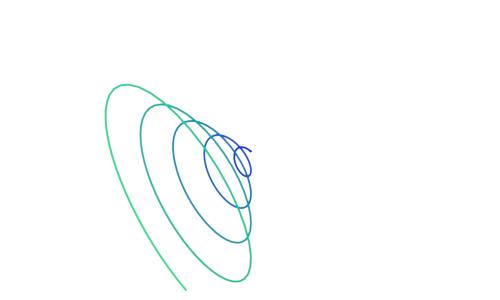

JupyterWgpuCanvas()

In [36]:
# just set the camera as "3d", the rest is basically the same :D 
plot_l3d = Plot(camera='3d')

# create a spiral
phi = np.linspace(0, 30, 200)

xs = phi * np.cos(phi)
ys = phi * np.sin(phi)
zs = phi

# use 3D data
# note: you usually mix 3D and 2D graphics on the same plot
spiral = np.dstack([xs, ys, zs])[0]

plot_l3d.add_line(data=spiral, thickness=2, cmap='winter')

plot_l3d.show()

In [37]:
# close canvas
plot_l3d.canvas.close()

# Scatter plots

### Plot tens of thousands or millions of points

#### There might be a small delay for a few seconds before the plot shows, this is due to shaders being compiled and a few other things. The plot should be very fast and responsive once it is displayed and future modifications should also be fast!

In [38]:
from fastplotlib import Plot
from ipywidgets import VBox, HBox, IntSlider
import numpy as np

RFBOutputContext()


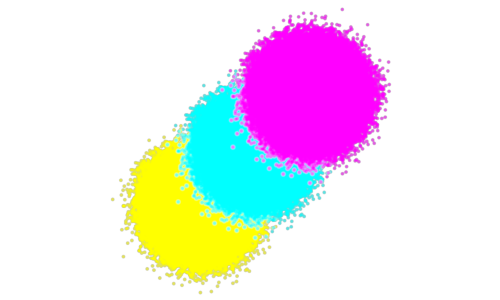

JupyterWgpuCanvas()

In [39]:
# create a random distribution of 10,000 xyz coordinates
n_points = 10_000

# if you have a good GPU go for 1.5 million points by uncommenting this :D 
n_points = 500_000

# dimensions always have to be [n_points, xyz]
dims = (n_points, 3)

clouds_offset = 15

# create some random clouds
normal = np.random.normal(size=dims, scale=5)
# stack the data into a single array
cloud = np.vstack(
    [
        normal - clouds_offset,
        normal,
        normal + clouds_offset,
    ]
)

# color each of them separately
colors = ["yellow"] * n_points + ["cyan"] * n_points + ["magenta"] * n_points

# create plot
plot_s = Plot()

# use an alpha value since this will be a lot of points
scatter_graphic = plot_s.add_scatter(data=cloud, sizes=4, colors=colors, alpha=0.8)

plot_s.show()

### scatter graphic features work similarly to line graphic

In [40]:
# half of the first cloud's points to red
scatter_graphic.colors[:n_points:2] = "r"

In [41]:
# set the green value directly
scatter_graphic.colors[n_points:n_points * 2, 1] = 0.3

In [42]:
# set color values directly using an array
scatter_graphic.colors[n_points * 2:] = np.repeat([[1, 1, 0, 0.5]], n_points, axis=0)

In [43]:
# change the data, change y-values
scatter_graphic.data[n_points:n_points * 2, 1] += 15

In [44]:
# set x values directly but using an array
scatter_graphic.data[n_points:n_points * 2, 0] = np.linspace(-40, 0, n_points)

# Kill the kernel before moving on to the next demo!